In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
retail_df = pd.read_csv("Resources/retail_price_cleaned.csv")

retail_df.head()

,product_id,product_category_name,month_year,qty_sold,total_price,freight_price,unit_price,product_rating,no_customers,month,...,comp1_price,comp1_prod_rating,comp1_freight_price,comp2_price,comp2_prod_rating,comp2_freight_price,comp3_price,comp3_prod_rating,comp3_freight_price,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,4.0,57,5,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,4.0,61,6,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,4.0,123,7,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,4.0,90,8,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,4.0,54,9,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


In [9]:
retail_df.columns

Index(['product_id', 'product_category_name', 'month_year', 'qty_sold',
       'total_price', 'freight_price', 'unit_price', 'product_rating',
       'no_customers', 'month', 'year', 'seasonality', 'volume', 'comp1_price',
       'comp1_prod_rating', 'comp1_freight_price', 'comp2_price',
       'comp2_prod_rating', 'comp2_freight_price', 'comp3_price',
       'comp3_prod_rating', 'comp3_freight_price', 'lag_price'],
      dtype='object')

In [3]:
summary_stats = retail_df.describe()
summary_stats

,qty_sold,total_price,freight_price,unit_price,product_rating,no_customers,month,year,seasonality,volume,comp1_price,comp1_prod_rating,comp1_freight_price,comp2_price,comp2_prod_rating,comp2_freight_price,comp3_price,comp3_prod_rating,comp3_freight_price,lag_price
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,14.495562,1422.708728,20.682270,106.496800,4.085503,81.028107,6.192308,2017.525148,14.644970,10664.627219,79.452054,4.159467,18.597610,92.930079,4.123521,18.620644,84.182642,4.002071,17.965007,107.399684
std,15.443421,1700.123100,10.081817,76.182972,0.232021,62.055560,3.243455,0.499737,11.930276,9172.801850,47.933358,0.121652,9.406537,49.481269,0.207189,6.424174,47.745789,0.233292,5.533256,76.974657
min,1.000000,19.900000,0.000000,19.900000,3.300000,1.000000,1.000000,2017.000000,0.484262,640.000000,19.900000,3.700000,0.095439,19.900000,3.300000,4.410000,19.900000,3.500000,7.670000,19.850000
25%,4.000000,333.700000,14.761912,53.900000,3.900000,34.000000,3.000000,2017.000000,7.510204,3510.000000,49.910000,4.100000,13.826429,53.900000,4.100000,14.485000,53.785714,3.900000,15.042727,55.668750
50%,10.000000,807.890000,17.518472,89.900000,4.100000,62.000000,6.000000,2018.000000,11.316760,8000.000000,69.900000,4.200000,16.618984,89.990000,4.200000,16.811765,59.900000,4.000000,16.517110,89.900000
75%,18.000000,1887.322500,22.713558,129.990000,4.200000,116.000000,8.000000,2018.000000,17.745704,15750.000000,104.256549,4.200000,19.732500,117.888889,4.200000,21.665238,99.990000,4.100000,19.447778,129.990000
max,122.000000,12095.000000,79.760000,364.000000,4.500000,339.000000,12.000000,2018.000000,100.000000,32736.000000,349.900000,4.500000,57.230000,349.900000,4.400000,57.230000,255.610000,4.400000,57.230000,364.000000


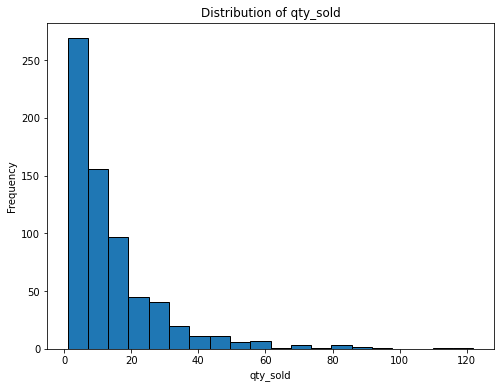

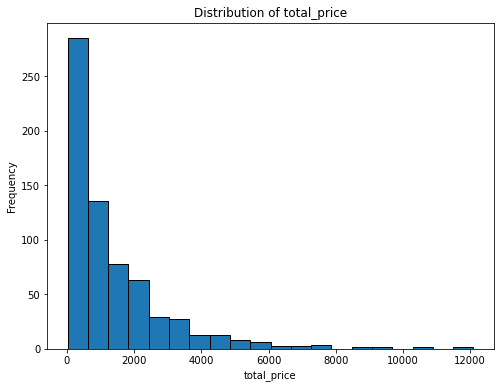

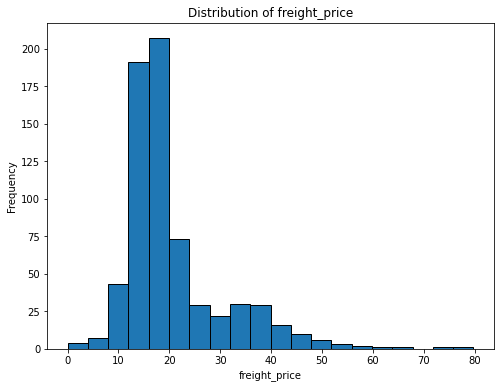

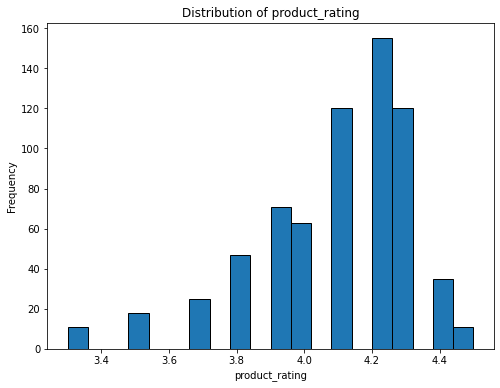

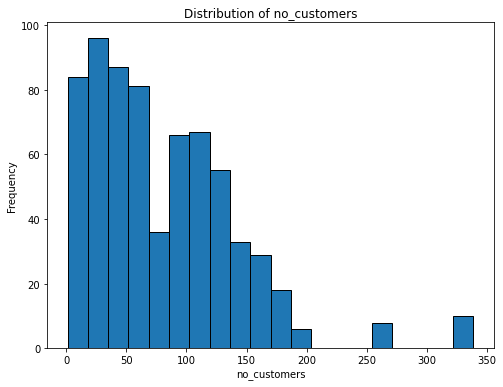

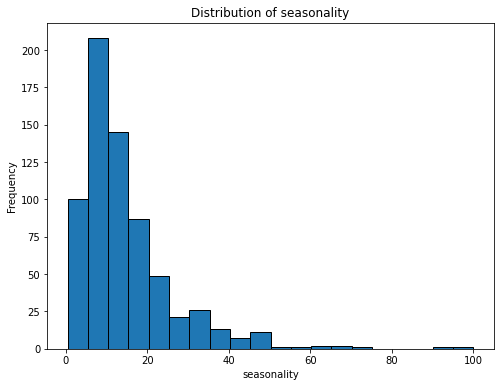

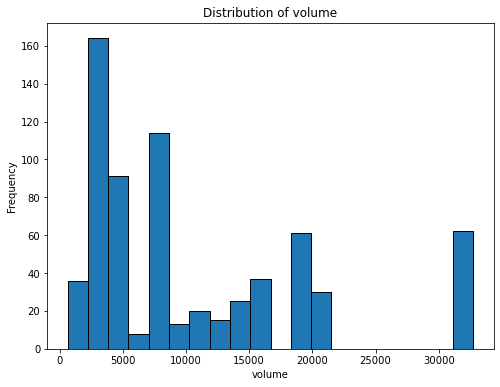

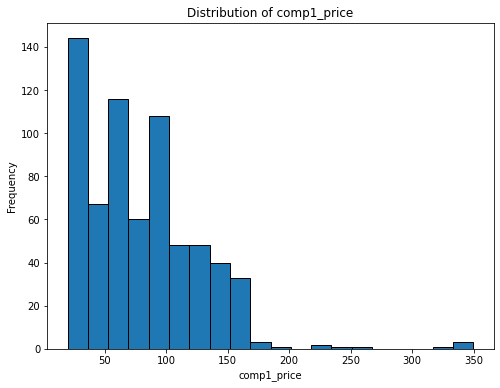

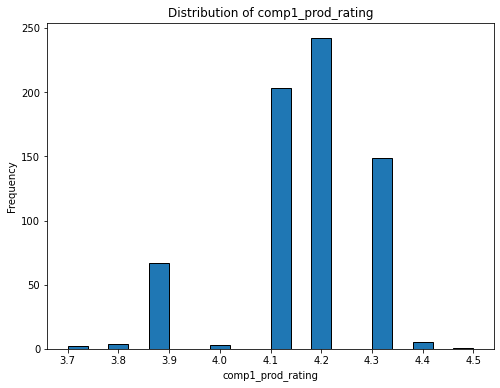

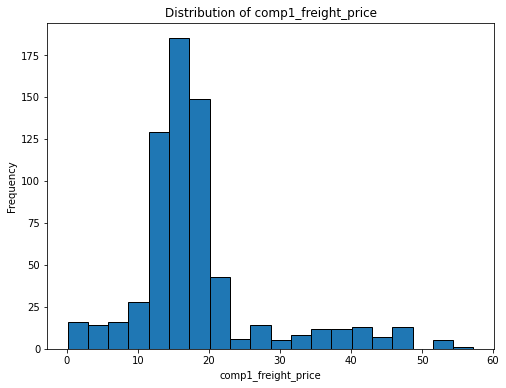

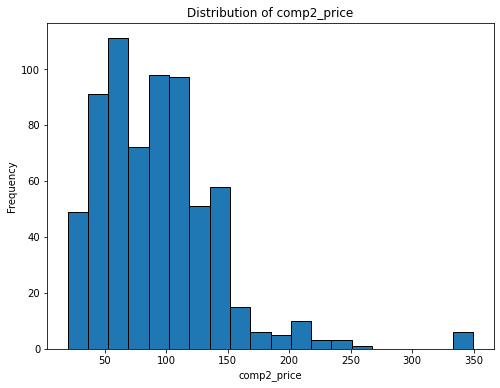

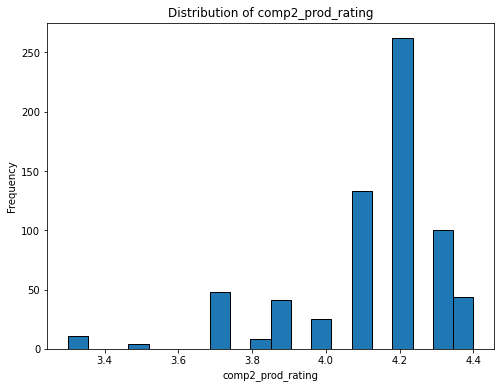

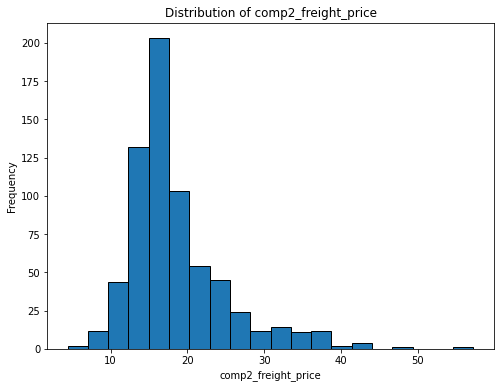

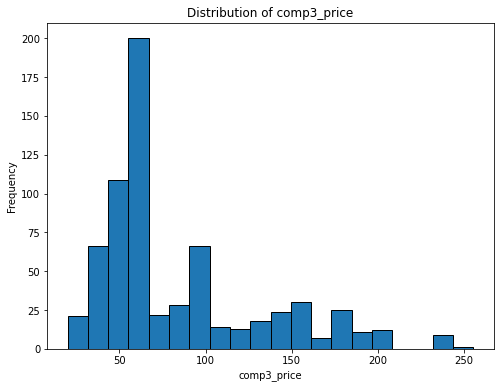

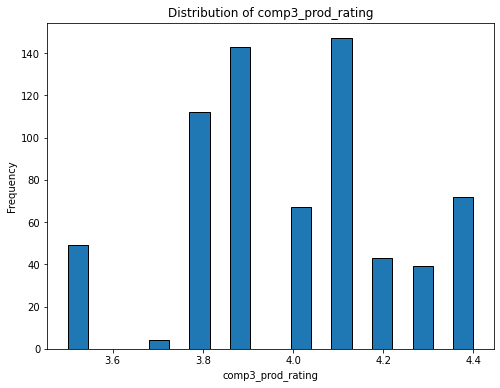

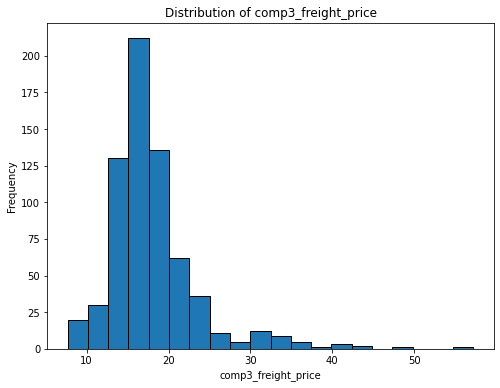

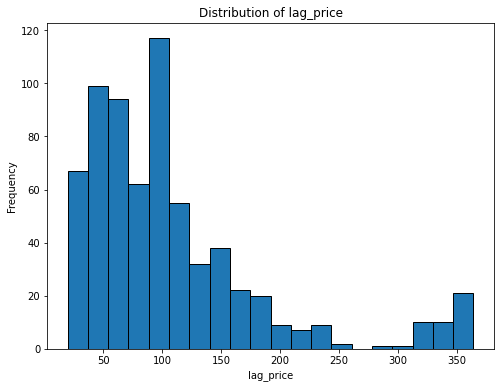

In [4]:
import matplotlib.pyplot as plt

numerical_features = ['qty_sold', 'total_price', 'freight_price', 'product_rating',
                      'no_customers', 'seasonality', 'volume', 'comp1_price',
                      'comp1_prod_rating', 'comp1_freight_price', 'comp2_price',
                      'comp2_prod_rating', 'comp2_freight_price', 'comp3_price',
                      'comp3_prod_rating', 'comp3_freight_price', 'lag_price']

for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    plt.hist(retail_df[feature], bins=20, edgecolor='k')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


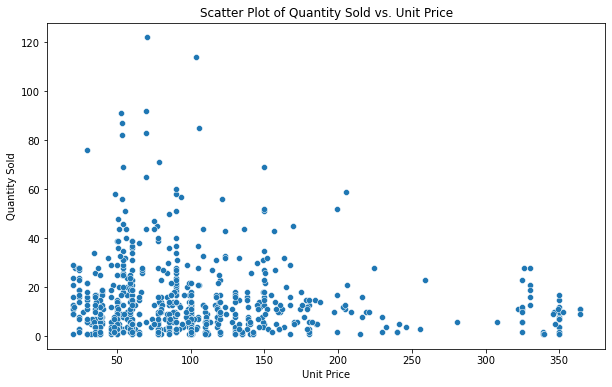

In [5]:
# Scatter plot of qty_sold vs. unit_price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=retail_df, x='unit_price', y='qty_sold')
plt.title('Scatter Plot of Quantity Sold vs. Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Quantity Sold')
plt.show()

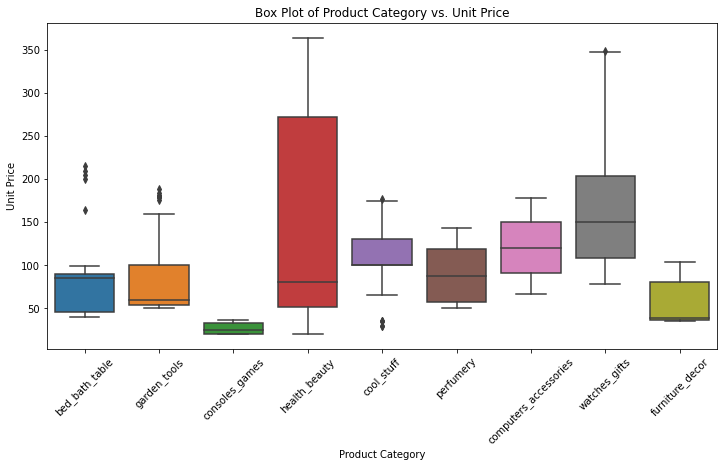

In [6]:
# Box plot of product_category_name vs. unit_price
plt.figure(figsize=(12, 6))
sns.boxplot(data=retail_df, x='product_category_name', y='unit_price')
plt.title('Box Plot of Product Category vs. Unit Price')
plt.xticks(rotation=45)
plt.xlabel('Product Category')
plt.ylabel('Unit Price')
plt.show()

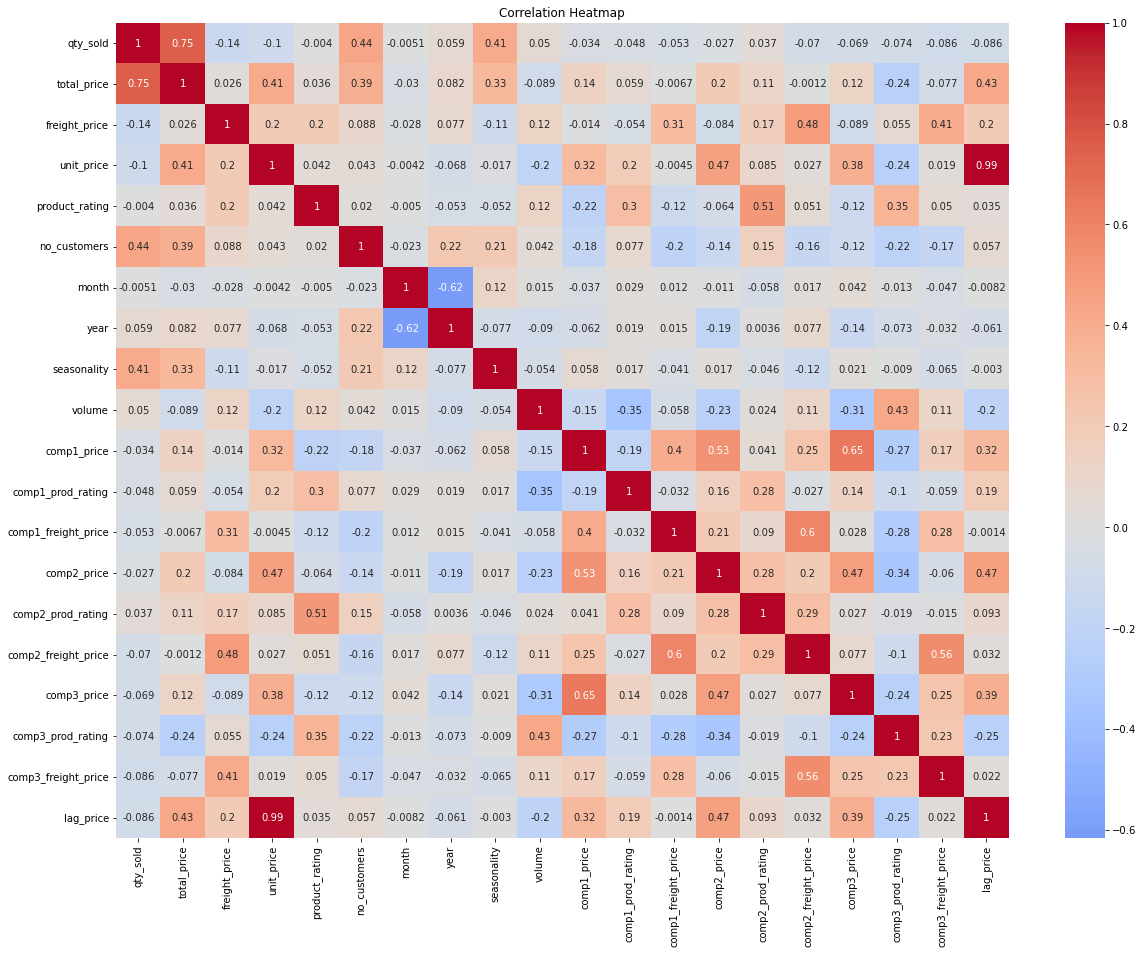

In [7]:
correlation_matrix = retail_df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()